#Traffic Sign CNN Model

##importing the library and Datasets

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import pickle
import sklearn

In [2]:
#Loading the Dataset with the help of Pickle
#Datasets will be from the kaggle link:
# https://www.kaggle.com/datasets/codewithpiri/traffic-signs-data-with-pickle-files
# download the data and upload to the same notebook and start coding
with open("./train.p",mode='rb') as training_data:
  train=pickle.load(training_data)
with open("./valid.p",mode='rb') as validation_data:
  valid=pickle.load(validation_data)
with open("./train.p",mode='rb') as testing_data:
  test=pickle.load(testing_data)

In [3]:
#Extrating the features and labels of the Training,testing and validation datasets
X_train,y_train=train['features'],train['labels']
X_valid,y_valid=valid['features'],valid['labels']
X_test,y_test=test['features'],test['labels']


In [4]:
print(X_train.shape)
print(y_train.shape)

(34799, 32, 32, 3)
(34799,)


##image exploration

In [5]:
#importing the library for the image plotting
import matplotlib.pyplot as plt


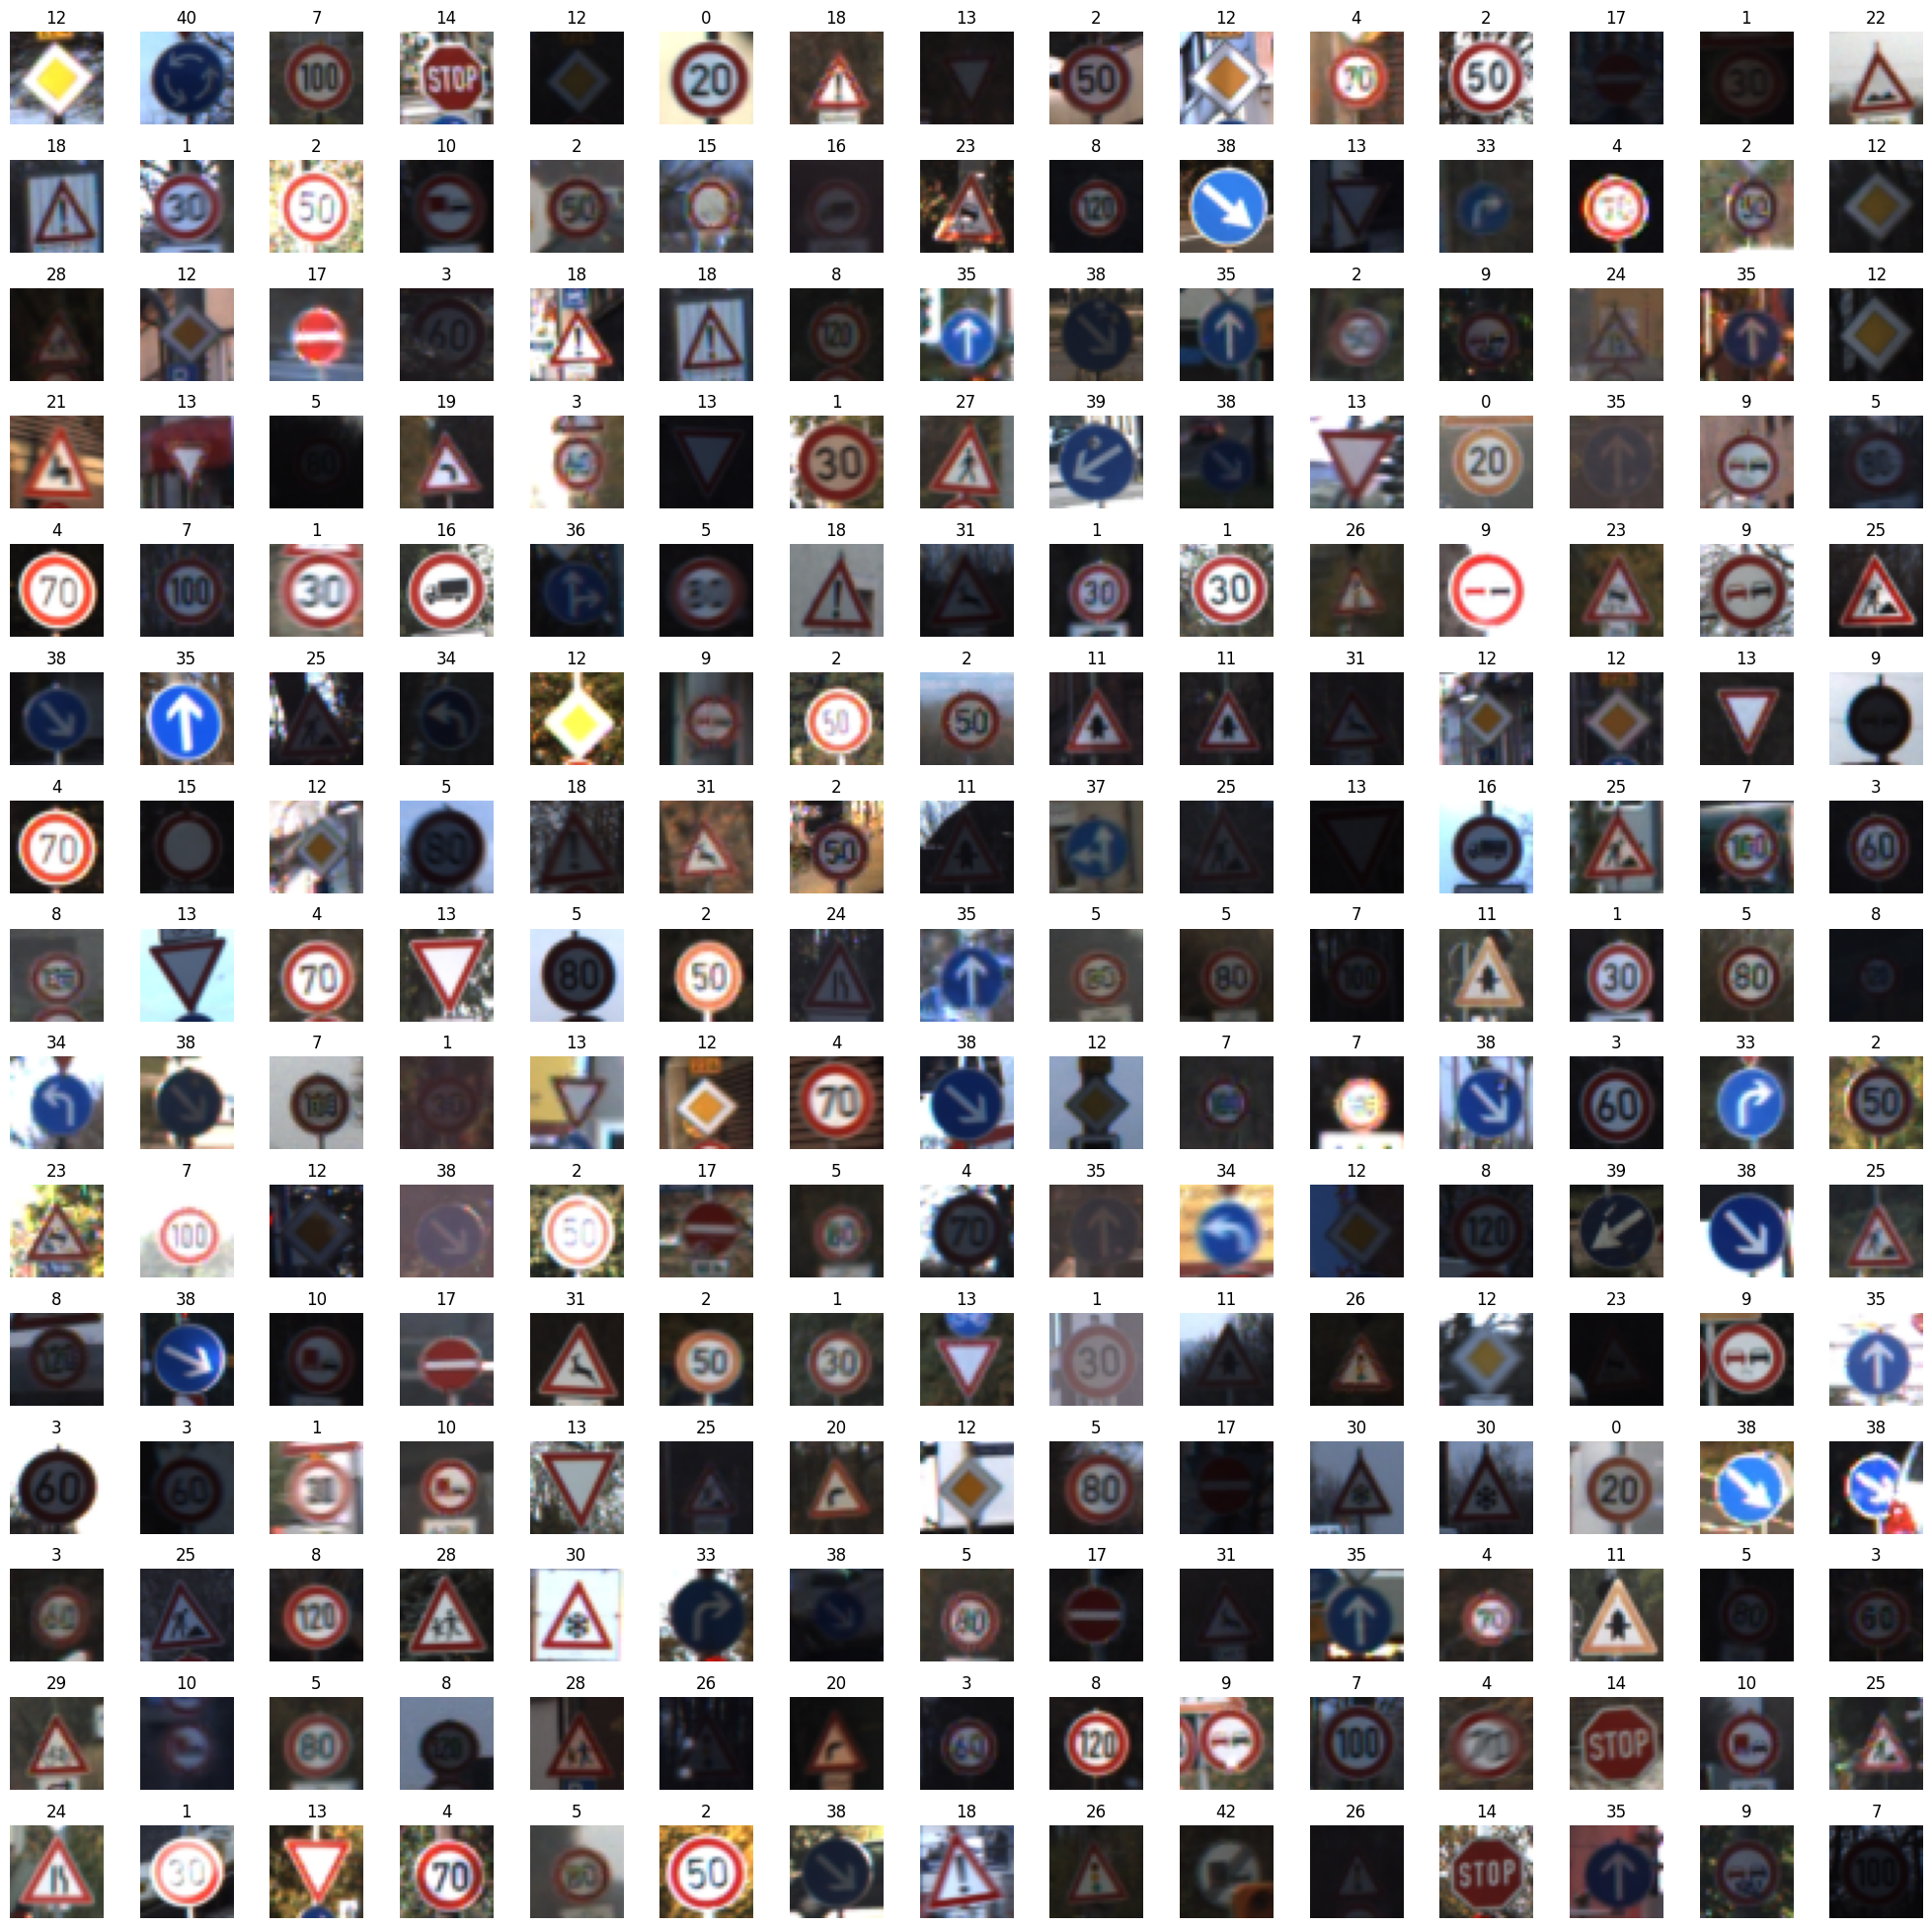

In [6]:
#Plotting the colored Image of the Training dataset with the labels
fig,axes=plt.subplots(15,15,figsize=(25,25))
axes=axes.ravel()
n_training=len(X_train)
for i in range(15*15):
  index=np.random.randint(n_training)
  axes[i].imshow(X_train[index])
  axes[i].set_title(y_train[index])
  axes[i].axis('off')

plt.subplots_adjust(wspace=0.4)


##Conversion the color image to grey

In [7]:
# Shufflin the data and converting the data to grey images
from sklearn.utils import shuffle
X_train,y_train=shuffle(X_train,y_train)
X_train_grey=np.sum(X_train/3,axis=3,keepdims=True)
X_test_grey=np.sum(X_test/3,axis=3,keepdims=True)
X_valid_grey=np.sum(X_valid/3,axis=3,keepdims=True)


In [8]:
# Normalization of the image pixels values
X_train_grey_norm=(X_train_grey-128)/128
X_test_grey_norm=(X_test_grey-128)/128
X_valid_grey_norm=(X_valid_grey-128)/128

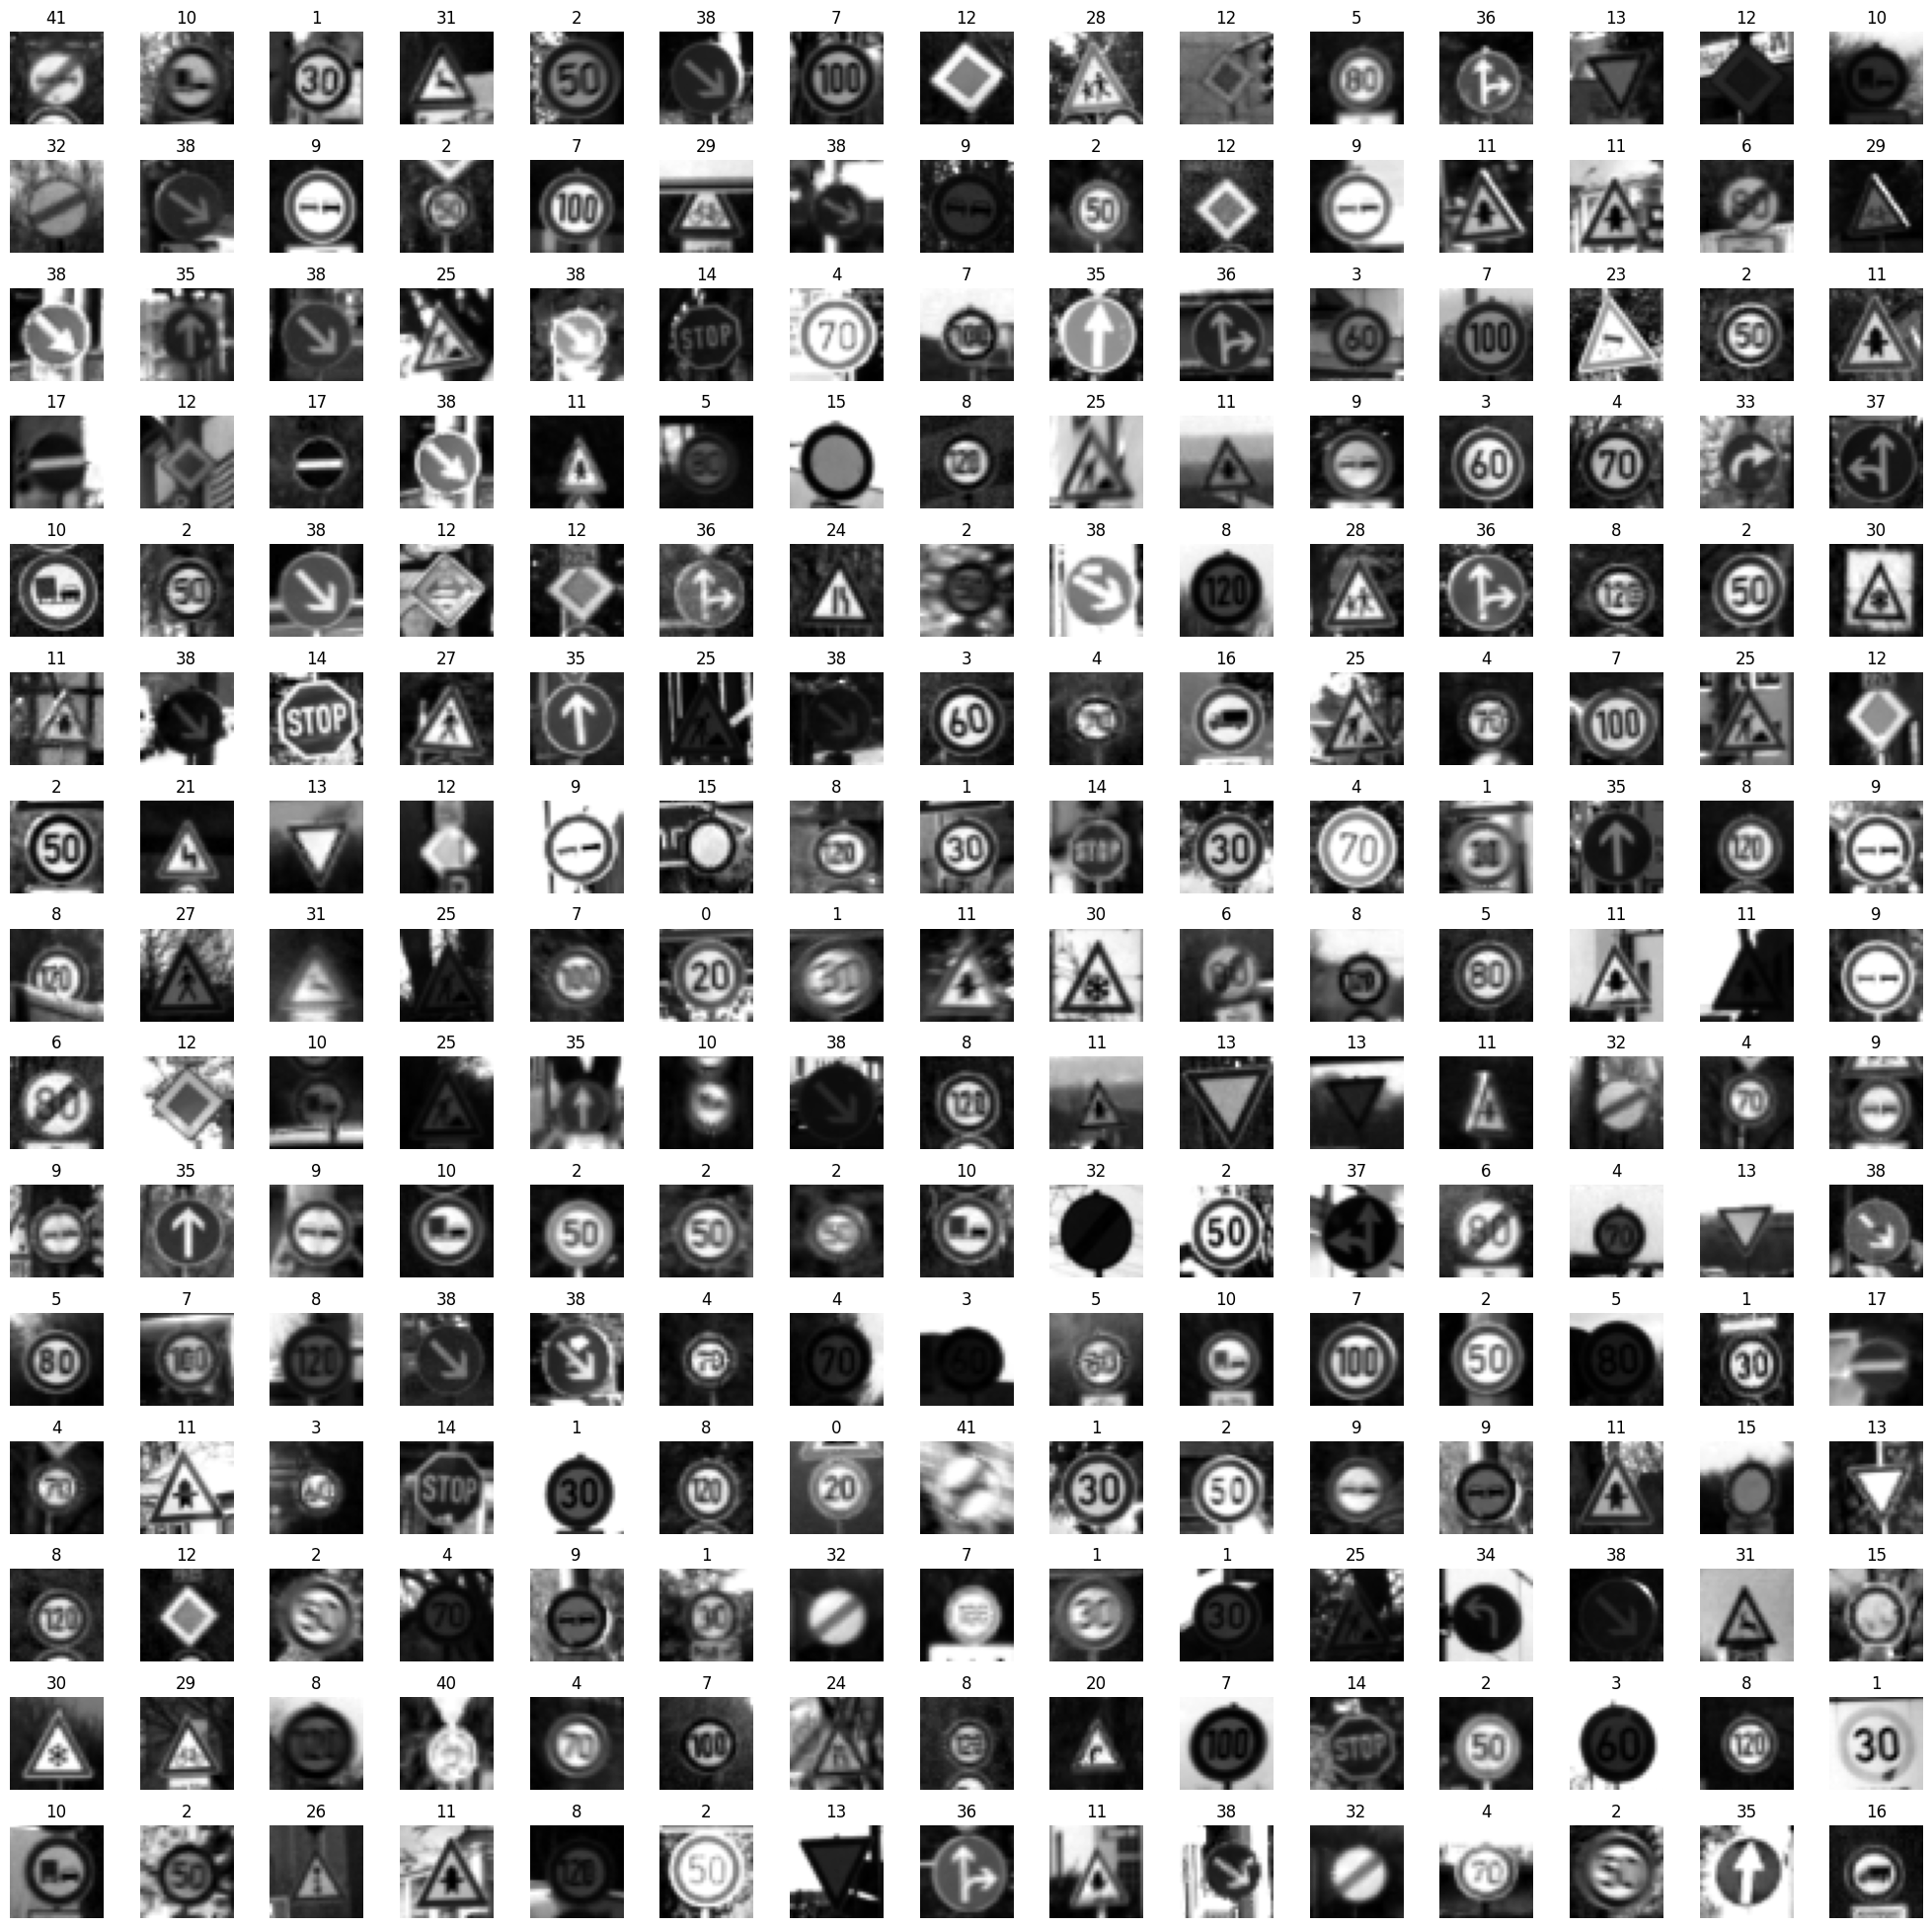

In [9]:
#Plotting the grey images and their lebels
fig,axes=plt.subplots(15,15,figsize=(25,25))
axes=axes.ravel()
n_training=len(X_train_grey)
for i in range(15*15):
  index=np.random.randint(n_training)
  axes[i].imshow(X_train_grey_norm[index].squeeze(),cmap='gray')
  axes[i].set_title(y_train[index])
  axes[i].axis('off')

plt.subplots_adjust(wspace=0.4)

##Model Building

In [10]:
# importing the libarary for the CNN Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import AveragePooling2D,MaxPooling2D,Dense,Flatten,Dropout,Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [11]:
# Model Buidling
cnn_model=Sequential()

#First Convolution layer
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(32,32,1),activation='relu'))
cnn_model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
cnn_model.add(AveragePooling2D(2,2))

#Second Convolution layer
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
cnn_model.add(AveragePooling2D(2,2))


# Flattening the data
cnn_model.add(Flatten())

# Hidden Layers
cnn_model.add(Dense(units=512,activation='relu'))  # first hidden layer
cnn_model.add(Dense(units=512,activation='relu'))  # Second Hidden layer
cnn_model.add(Dense(units=43,activation='softmax')) # ouput layer with the 43 catregory

#compiling the model
cnn_model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])







/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
# fitting the model
hist=cnn_model.fit(X_train_grey_norm,y_train,epochs=5,batch_size=500,validation_data=(X_valid_grey_norm,y_valid))

Epoch 1/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.1704 - loss: 3.1169 - val_accuracy: 0.6977 - val_loss: 0.9906
Epoch 2/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 108s 2s/step - accuracy: 0.8266 - loss: 0.5755 - val_accuracy: 0.8549 - val_loss: 0.5557
Epoch 3/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 141s 2s/step - accuracy: 0.9451 - loss: 0.2023 - val_accuracy: 0.8973 - val_loss: 0.4026
Epoch 4/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.9740 - loss: 0.0948 - val_accuracy: 0.9118 - val_loss: 0.3455
Epoch 5/5
70/70 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.9868 - loss: 0.0544 - val_accuracy: 0.9066 - val_loss: 0.4392


##Model Evaluation

In [13]:
# printing the Model testing accuracy
score=cnn_model.evaluate(X_test_grey_norm,y_test)
print('Test Accuracy:{}'.format(score[1]))

1088/1088 ━━━━━━━━━━━━━━━━━━━━ 37s 34ms/step - accuracy: 0.9835 - loss: 0.0538
Test Accuracy:0.9860053658485413


In [14]:
# Getting the accuracy and loss matrices
accuracy = hist.history['accuracy']
val_accuracy = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs = range(len(accuracy))

<ipython-input-15-f89e1c479ffe>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs,accuracy,'b',label='Training Accuracy',color='red')


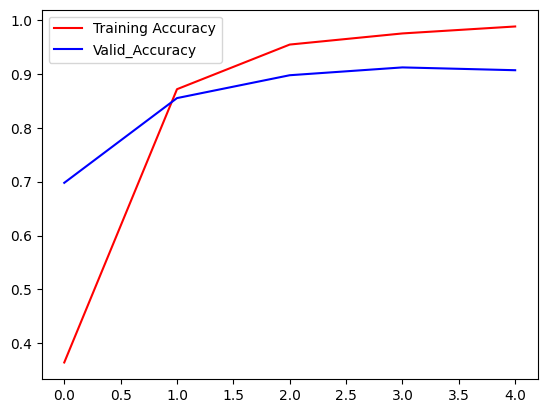

In [15]:
# Plotting the Accuracy
plt.plot(epochs,accuracy,'b',label='Training Accuracy',color='red')
plt.plot(epochs,val_accuracy,'b',label='Valid_Accuracy')
plt.legend()

<ipython-input-16-d18fb4426eaa>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs,loss,'b',label='Training_loss',color='red')


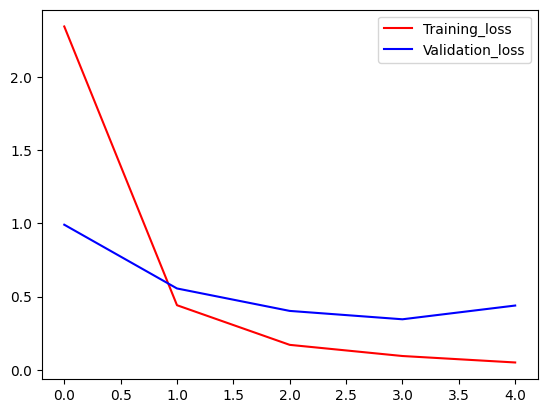

In [16]:
# Plotting the loss
plt.plot(epochs,loss,'b',label='Training_loss',color='red')
plt.plot(epochs,val_loss,'b',label='Validation_loss')
plt.legend()

#Thanks